# NBA Position Prediction Project

Author: Joshua Sunga

Course Project, UC Irvine, Math 10, S23

## Introduction

My project makes use of the 2022-2023 NBA season data and a machine learning model to tell us what position a player is purely based off of statistics. By using advanced statistics such as PPG(points per game), BPG (blocks per game), RPG(rebounds per game), and many more, we can train models to tell us if a player is a point guard, shooting guard, small forward, power foward, or center.

## Preparing NBA 2022-2023 Stats

In [1]:
import seaborn as sns
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('NBAStats.csv')
df2 = pd.read_csv('extendedNBAdata.csv')

Here, I've loaded two data sets from the 2022-2023 NBA season that hold many different statistics for each player. df holds total statistics, such as total points, total blocks, and more. Since I want the averages(stat per game), I will create new columns containing this info. Df2 holds more crucial data such as True Shooting Percentage and 3 Point Percentage so I will also add specific columns from df2 to df.

In [2]:
df["PPG"] = (df["PTS"] / df["G"]).round(2)
df["APG"] = (df["AST"] / df["G"]).round(2)
df["RPG"] = ((df["ORB"] + df["DRB"]) / df["G"]).round(2)
df["SPG"] = (df["STL"] / df["G"]).round(2)
df["MPG"] = (df["MP"] / df["G"]).round(2)
df["BPG"] = (df["BLK"] / df["G"]).round(2)
df["TPG"] = (df["TOV"] / df["G"]).round(2)
df = df.fillna(0)
df['Pos'] = df['Pos'].str.split('-')
df = df.explode('Pos')

df2.fillna(0)
df2 = df2.dropna(how='all', axis=1)

for i in range(5, 10):
    df[df2.columns[i]] = df2.iloc[:, i]

df = df.fillna(0)
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,RPG,SPG,MPG,BPG,TPG,TS%,USG%,OWS,DWS,WS
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,...,5.96,0.56,20.73,0.55,1.07,0.000,0.0,0.0,0.0,0.0
1,2,Steven Adams,C,29,MEM,42,42,1133,157,263,...,11.55,0.86,26.98,1.10,1.88,0.503,18.5,0.4,2.1,2.5
2,3,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,...,9.17,1.17,34.64,0.81,2.49,0.560,12.0,3.8,3.0,6.8
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,...,2.05,0.27,20.49,0.25,0.69,0.608,25.0,3.6,3.5,7.2
4,5,Santi Aldama,PF,22,MEM,77,20,1682,247,525,...,4.82,0.58,21.84,0.62,0.78,0.452,18.4,-0.1,0.4,0.3


Df now contains all the statistics I believe are necessary to teach a model how to predict their position. I will make a dataframe containing the averages for each position.

In [3]:
statlist = ["FG", "FGA", "FG%", "3P", "3P%", "2P", "2PA", "2P%", "FT", "FTA", "FT%", "MPG", "PPG", "3PA", "DRB", "ORB", "RPG", "APG", "SPG", "BPG", "TPG", "TS%", "USG%", "OWS", "DWS", "WS"]

df_avg = df.groupby("Pos")[statlist].mean().round(2)
df_avg

,FG,FGA,FG%,3P,3P%,2P,2PA,2P%,FT,FTA,...,RPG,APG,SPG,BPG,TPG,TS%,USG%,OWS,DWS,WS
Pos,,,,,,,,,,,,,,,,,,,,,
C,157.21,276.97,0.55,17.91,0.26,139.30,226.19,0.59,70.89,99.43,...,5.07,1.21,0.43,0.70,0.95,0.48,18.41,0.77,0.77,1.55
PF,174.35,362.23,0.47,47.27,0.32,127.07,226.98,0.56,77.72,101.44,...,4.16,1.71,0.56,0.41,1.08,0.53,18.72,0.86,0.79,1.65
PG,188.84,422.83,0.42,63.39,0.33,125.45,245.71,0.47,92.45,112.76,...,2.70,3.93,0.79,0.24,1.48,0.53,18.08,1.05,0.87,1.92
SF,165.89,364.85,0.44,61.08,0.33,104.81,197.24,0.51,64.93,80.89,...,3.06,1.51,0.61,0.27,0.87,0.51,18.08,0.94,0.84,1.79
SG,170.10,380.02,0.43,65.76,0.35,104.35,202.46,0.50,69.20,85.07,...,2.46,1.99,0.64,0.24,1.02,0.53,17.62,0.90,0.85,1.76


## Display of Data
Since we've loaded and prepared our data in the way we want to, we can actually look at the statistics we have by using multiple graphs. These graphs give us an idea of the seperation between positions and the statistics they yield. I will show just a few for space sake.

In [4]:
for i in range(5):
    avg_ppg = df.groupby('Pos')[statlist[i]].mean().reset_index()

    ppg_g = alt.Chart(avg_ppg, height=100, width=150).mark_bar().encode(
        x = "Pos",
        y = statlist[i],
        color = "Pos"
    )
    display(ppg_g)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

As we can see, the position with the biggest shifts and noticeable changes in these 5 statistics is center, which makes sense. Centers typically play within the paint which explains their high FG%(Field Goal %) and their low 3 pointers made.

In [5]:
sett = [13, 15, 18]

for i in sett:
    for j in sett:
        if i != j:  # To avoid comparing the same stat with itself
            scatterplot = alt.Chart(df, height=100, width=125).mark_circle().encode(
                x=alt.X(statlist[i], title=statlist[i]),
                y=alt.Y(statlist[j], title=statlist[j]),
                color='Pos:N'
            ).properties(
                title=f"{statlist[i]} vs {statlist[j]} by Position"
            )
            regression_line = scatterplot.transform_regression(
                statlist[i], statlist[j], groupby=['Pos']
            ).mark_line()

            final_plot = scatterplot + regression_line

            final_plot.display()


alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

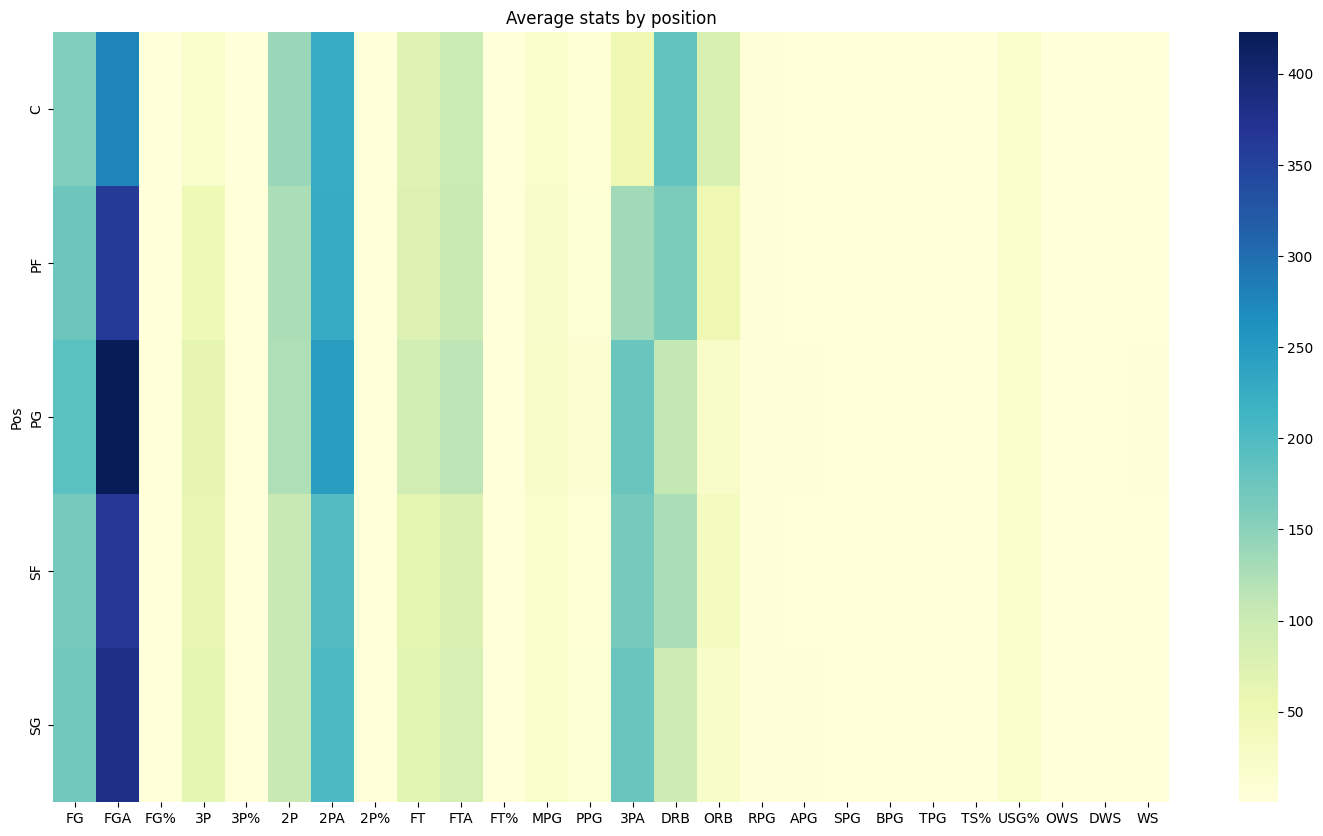

In [6]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_avg, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title('Average stats by position')
plt.show()

Finally, we can see how all our data compares by using a heat map generated from seaborn to show us the difference in stats produced by position on average.

## Training our models.

Since we've displayed our graphs to get a better understanding of the differences between our positions, we can now train multiple different models and compare the accuracy of each model to see how well they perform given the stats from statlist.

By using a double for loop, we can compare data by data per position and combine what would make multiple graphs per position into one. Above are a few scatter plots that show the comparison between 3PA(3 point attempts), SPG(steals per game), and ORB(offensive rebounds) as well as a line generated using altair to display slope differences between position.

In [7]:
X = df[statlist]
y = df['Pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train, y_train)

dtree_predictions = dtree.predict(X_test)

The code above is essentially setting our model up with input statlist and target position. We will now create a decision tree and calculate the accuracy of our model by using the classification_report import

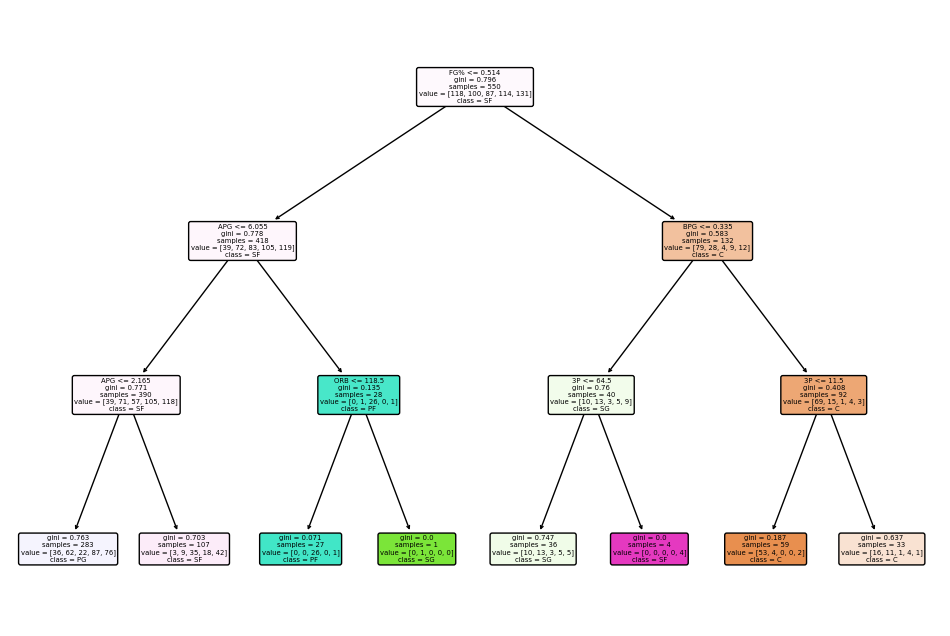

In [8]:
class_names = df['Pos'].unique()
plt.figure(figsize=(12,8)) 
plot_tree(dtree, filled=True, rounded=True, class_names=class_names, feature_names=X.columns)
plt.show()

In [9]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           C       0.86      0.55      0.67        22
          PF       0.33      0.12      0.18        24
          PG       0.67      0.12      0.21        32
          SF       0.19      0.57      0.28        23
          SG       0.30      0.32      0.31        37

    accuracy                           0.32       138
   macro avg       0.47      0.34      0.33       138
weighted avg       0.46      0.32      0.32       138



As we can see, our model has shown good accuracy when prediction point guards and centers, but has a poor time predicting power forwards and shooting guards, and an even worse time predicting small forwards. This makes sense since the graphics above have shown us that point guards and centers have the most establishment in statistics as a result of the roles they play in the game. Shooting guards and small fowards are typically interchangeable since a player who plays one can typically play the other, a good example is Klay Thompson(played both shooting guard and small fowards for the warriors). Power forwards also play similarly to both small forwards and centers. Let's see how other models compare.

In [10]:
rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=31)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           C       0.76      0.73      0.74        22
          PF       0.50      0.29      0.37        24
          PG       0.69      0.28      0.40        32
          SF       0.16      0.22      0.19        23
          SG       0.39      0.62      0.48        37

    accuracy                           0.43       138
   macro avg       0.50      0.43      0.44       138
weighted avg       0.50      0.43      0.43       138



In [11]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           C       0.64      0.73      0.68        22
          PF       0.37      0.29      0.33        24
          PG       0.14      0.03      0.05        32
          SF       0.21      0.30      0.25        23
          SG       0.34      0.49      0.40        37

    accuracy                           0.36       138
   macro avg       0.34      0.37      0.34       138
weighted avg       0.32      0.36      0.33       138



As we can see, Random Forest classifier and KNeighborsClassifier yielded different results from our original decision tree classifier. This could be a product of their differences as machine learning models or the characteristics included in each model. As shown from our classification report, Random Forest classification yieleded the best results. 

## Testing our Model

Since we've established that Random Forest classifier has the best odds of correctly predicting a player's position, we will use it on a data set from a completely different season with different players(a few reoccuring) and make a new column to show what our model predicted.

In [12]:
df_test = pd.read_csv('comparestats.csv')

df_test["PPG"] = (df_test["PTS"] / df_test["G"]).round(2)
df_test["APG"] = (df_test["AST"] / df_test["G"]).round(2)
df_test["RPG"] = ((df_test["ORB"] + df_test["DRB"]) / df_test["G"]).round(2)
df_test["SPG"] = (df_test["STL"] / df_test["G"]).round(2)
df_test["MPG"] = (df_test["MP"] / df_test["G"]).round(2)
df_test["BPG"] = (df_test["BLK"] / df_test["G"]).round(2)
df_test["TPG"] = (df_test["TOV"] / df_test["G"]).round(2)

df_test.fillna(0)
df_test = df_test.dropna(how='all', axis=1)
df_test['Pos'] = df_test['Pos'].str.split('-')
df_test = df_test.explode('Pos')

for i in range(5, 10):
    df_test[df_test.columns[i]] = df_test.iloc[:, i]

Simply applying the same applications made to the first data set(df).

In [13]:
Xdft = df_test[statlist]
predicted_positions = rf.predict(Xdft)
df_test['Predicted Position'] = predicted_positions
df_test[[df_test.columns[1], 'Pos', 'Predicted Position']]

,Player��,Pos,Predicted Position
0,Ivica Zubac,C,C
1,Cody Zeller,C,C
2,Trae Young,PG,PG
3,Thaddeus Young,PF,C
4,Delon Wright,PG,SG
5,Robert Woodard II,SF,SF
6,Christian Wood,C,C
7,James Wiseman,C,C
8,Cassius Winston,PG,SF
9,Justise Winslow,SF,SF


As we can see, our model is pretty good with predicting positions off of statistics, with only 4 out of these 13 players being predicted wrong. Ofcourse, the number would look different with a bigger sample, but it still shows us that the machine works. I believe a big reason why the model is so good at predicting specifically Point Guards and Centers accurately, but not hte others, is because of a lack of data. As we saw in the graphics above, there are a few graphics where the positions don't actually seem too off from the other positions. I believe our model could be upgraded to high accuracy had we of had player attirbute statistics, such as height, wingspan, vertical, and more. These statistics are generally help differentiate a player from a point guard and a shooting guard or a power forward from a small forward.

## Summary

In my final math 10 project, I loaded two data sets that held advanced types of player data from the 2022-2023 NBA season to see if I could teach a machine learning model to predict the postion of a player purely off of patterns from the statistics. By using multiple different libraries and imports, I was able to display the patterns and data in the form of scatterplots, bargraphs, and a heat map, which helped us see differences between positions. Using this information, I tried to train three different machine learning models(Decision Tree Classifier, Random Forest Classifier, and KNeighbors) to predict a player's position and saw that Random Forest Classifier gave the best results.

## References

I refered to this stackoverflow website to understand the formatting of an altair heatmap
 
https://stackoverflow.com/questions/61621957/heatmap-visualization-altair

My data sets all came from the Total and Advanced section from Basketball Reference.
https://www.basketball-reference.com/leagues/NBA_2022_advanced.html

Originally, I wanted to use pytorch but it was far more depth than I thought it would be which led me to fray away and use KNeighbors instead. I used the documentation site to get a grasp of this machine. 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9c66e6f-11fc-47c6-b3c2-d3f35fe63f22' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>